In [ ]:
%reset -f

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *

# Load each
datasets = {}
for hour in range(24):
    datasets[hour] = pd.read_csv(f"Splits/dataset_hour_{hour}.csv")

datasets_train = {hour: datasets[hour][(datasets[hour]['DATE'] >= '2014-01-01') & (datasets[hour]['DATE'] < '2023-01-01')].drop(['DATE'], axis=1).to_numpy() for hour in range(24)}
datasets_test = {hour: datasets[hour][datasets[hour]['DATE'] >= '2023-01-01'].drop(['DATE'], axis=1).to_numpy() for hour in range(24)}

y_train = {hour: datasets_train[hour][:, 0].reshape(-1, 1) for hour in range(24)}
y_test = {hour: datasets_test[hour][:, 0].reshape(-1, 1) for hour in range(24)}

weather_train = {hour: datasets_train[hour][:, ::-1] for hour in range(24)}
weather_test = {hour: datasets_test[hour][:, ::-1] for hour in range(24)}

## Baseline

SMAPE baseline out of sample prediction: 59.7021779709288


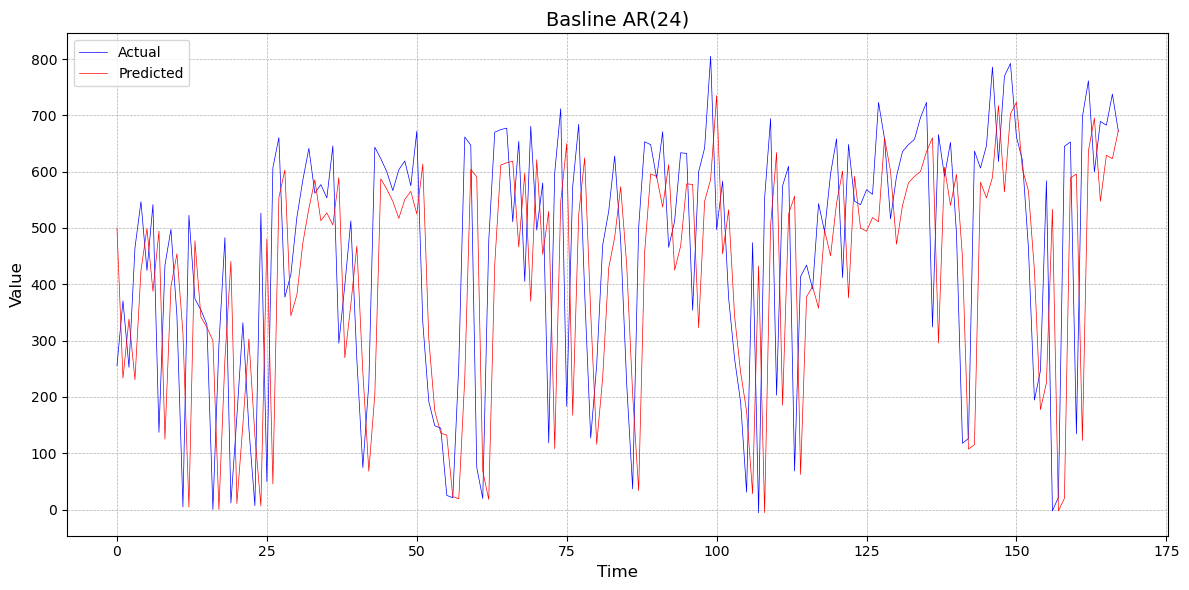

In [70]:
p = 1

con = 0
tr = 0
exog = 0

Beta, SEbeta, _, Pvalue, tratioBeta, res_baseline, _, _, aiccrit, hqccrit, siccrit = VARlsExog(y_train[0], p, con, tr, exog)


y_pred = y_test[0] @ Beta

smape_baseline = smape(y_test[0][p::], y_pred[:-p])

print(f'SMAPE baseline out of sample prediction: {smape_baseline}')

plot_actual_vs_predicted(y_test[0][p::], y_pred[:-p], "Basline AR(24)")

## Baseline with 24 lags

SMAPE baseline out of sample prediction: 53.210159654923416


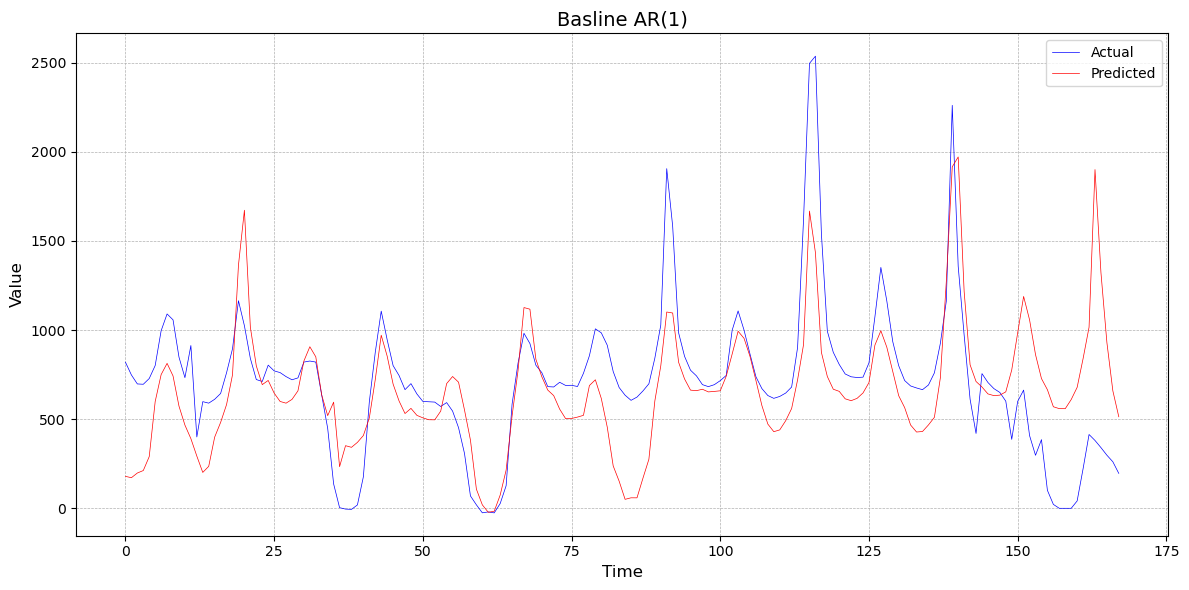

In [ ]:
p = 0

con = 0
tr = 0
exog = lags_train
# exog = weather_train
# exog = hour_dummies_train
# exog = all_train

Beta, SEbeta, _, Pvalue, tratioBeta, res_baseline, _, _, aiccrit, hqccrit, siccrit = VARlsExog(y_train, p, con, tr, exog)


y_pred = lags_test @ Beta

smape_baseline = smape(y_test[p::], y_pred[p::])

print(f'SMAPE baseline out of sample prediction: {smape_baseline}')

plot_actual_vs_predicted(y_test, y_pred, "Basline AR(1)")

## Extended baseline with weather data

SMAPE baseline out of sample prediction: 52.78274921111167


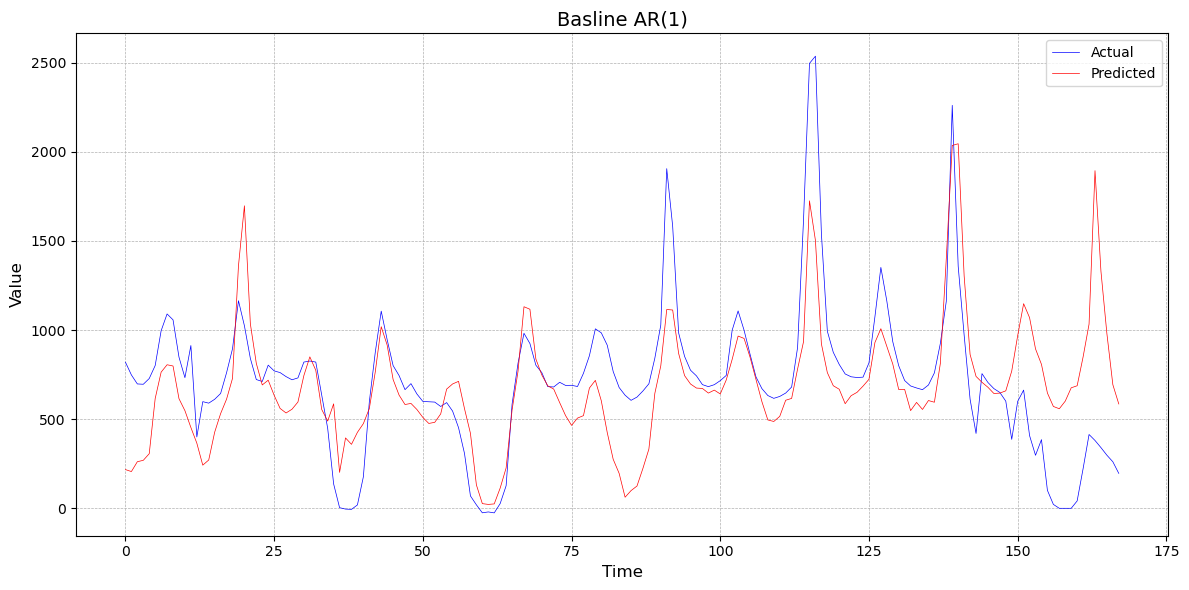

In [ ]:
p = 0

con = 0
tr = 0
exog = np.column_stack((lags_train, weather_train, hour_dummies_train))
# exog = hour_dummies_train
# exog = all_train



Beta, SEbeta, _, Pvalue, tratioBeta, res_baseline, _, _, aiccrit, hqccrit, siccrit = VARlsExog(y_train, p, con, tr, exog)


exog_test = np.column_stack((lags_test, weather_test, hour_dummies_test))

y_pred = exog_test @ Beta

smape_baseline = smape(y_test[p::], y_pred[p::])

print(f'SMAPE baseline out of sample prediction: {smape_baseline}')

plot_actual_vs_predicted(y_test, y_pred, "Basline AR(24)")